Zad 1.
Wygeneruj dane 2d oraz 3d w kształcie prostokąta (odpowiednio sześcianu) . Wykonaj PCA i narysuj wszystkie komponenty. 

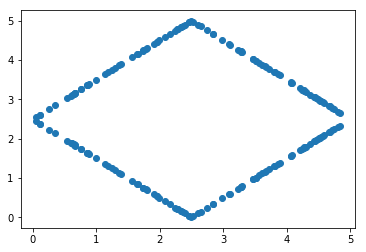

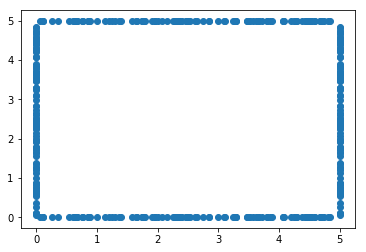

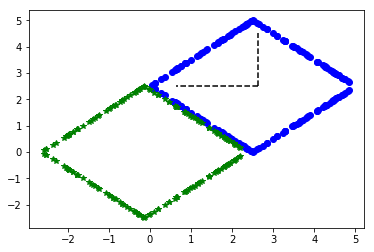

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
import matplotlib.mlab as pca
import random 
import math
import itertools

numb = 100
d = 5

x0 = (np.random.uniform(-d, d, numb))
y0 = abs(d/2 - abs(x0)) 
x0 = abs(x0)
y1 = -(abs(d/2 - abs(x0))-d)
X = np.append(x0, x0)
Y = np.append(y0, y1)
plt.scatter(X,Y)
plt.show()
matrix = np.concatenate([[X], [Y]])

y0 = [0] * numb
y1 = [d] * numb
X = np.append(x0, y0)
X = np.append(X, x0)
X = np.append(X, y1)
Y = np.append(y0, x0)
Y = np.append(Y, y1)
Y = np.append(Y, x0)
plt.scatter(X, Y)
plt.show()

def princomp(A):
 # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-np.mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = np.linalg.eig(np.cov(M)) # attention:not always sorted
    score = np.dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

coeff, score, latent = princomp(matrix.T)


# every eigenvector describe the direction of a principal component.
m = np.mean(matrix,axis=1)
plt.plot([0, -coeff[0,0]*2]+m[0], [0, -coeff[0,1]*2]+m[1],'--k')
plt.plot([0, coeff[1,0]*2]+m[0], [0, coeff[1,1]*2]+m[1],'--k')
plt.plot(matrix[0,:],matrix[1,:],'ob')

# new data
plt.plot(score[0,:],score[1,:],'*g')
plt.show()

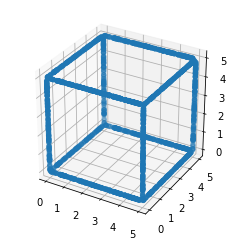

In [87]:
a = [0] * numb * 4
b = [d] * numb * 4
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
X2 = np.append(X,X)
X2 = np.append(X2,X)
X2 = np.append(X2,X)

Y2 = np.append(Y,Y)
Y2 = np.append(Y2,a)
Y2 = np.append(Y2,b)

Z2 = np.append(a,b)
Z2 = np.append(Z2, Y)
Z2 = np.append(Z2, Y)

ax.scatter(X2,Y2,Z2)
plt.show()

Zad 2.
Dla danych z powyższego zadania wybierz jedną (lub dwie dla danych 3d) i narysuj dane po redukcji wymiarowości 

 Zad 3.
Pobierz dawne dane (wymiaru więcej niż 5) z repozytorium UCI oraz wizualizuj je za pomocą PCA. 

 Zad 4.
Ściągnij bazę twarzy handwritten digits wykonaj algorytm PCA (5 wymiarów).

	from sklearn.datasets import load_digits
	digits = load_digits()
	print digits.keys()
	

Wykonaj grupowanie danych metodą k-means (k=9) na danych pełnego wymiaru oraz danych po algorytmie PCA wymiarach. Porównaj wyniki za pomocą miary Jaccard index. 

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


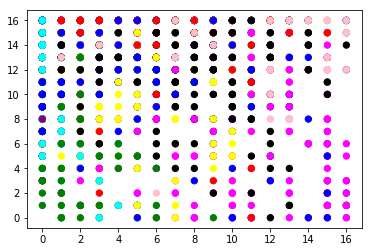

In [84]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
x = pd.DataFrame(digits.data)

model = KMeans(n_clusters=9)
model.fit(x)

colormap = np.array(['red', 'green', 'blue', 'yellow', 'black', 'purple', 'pink', 'cyan', 'magenta'])
plt.scatter(x[2], x[4],c=colormap[model.labels_], s=40)
plt.show()

 Zad 5.
Zaimplementuj PCA samodzielnie (link).
W tym zadaniu nie używaj wbudowanej funkcji PCA. MOżesz używać funkcji, które występują w poszczególnych krokach PCA.
Sprawdź działanie algorytmu na danych 3d redukując wymiarowość do 2d.

    Computing the d-dimensional mean vector
    Computing the Covariance Matrix
    Computing eigenvectors and corresponding eigenvalues
    Visualizing the eigenvectors
    Sorting the eigenvectors by decreasing eigenvalues
    Choosing k eigenvectors with the largest eigenvalues
    Transforming the samples onto the new subspace